In [ ]:
from random import seed, randrange
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import files

# Functions to create the datasets

In [ ]:
randomState = 10;

def from_int_to_Ndigits_string(val, ndigits):
  val = str(val);
  return val if len(val) == ndigits else f"{'0'*(ndigits-len(val))}{val}";


def fill_dataset(dataset_size, seed=84):
  dataset = {};
  i = 0;
  while i < dataset_size:
    aux1 = randrange(0,999);
    aux2 = randrange(0,999);
    key = from_int_to_Ndigits_string(aux1,3) + from_int_to_Ndigits_string(aux2,3);
    if key not in dataset:
      i += 1;
      dataset[key] = list(key) + list(from_int_to_Ndigits_string(aux1+aux2,4));
  return dataset;

# Columns deffinition

In [ ]:
allCols = ["X1", "X2", "X3", "X4", "X5", "X6", "Y1", "Y2", "Y3", "Y4"];
attribCols = ["X1", "X2", "X3", "X4", "X5", "X6"];
targetCols = ["Y1","Y2","Y3","Y4"];

# Create the datasets

In [ ]:
dataset_1_size = 25000;
dataset_2_size = 50000;

dataset_1 = fill_dataset(dataset_1_size);
dataset_2 = fill_dataset(dataset_2_size);

dataset_1 = pd.DataFrame.from_dict(dataset_1, orient='index', columns=allCols);
dataset_2 = pd.DataFrame.from_dict(dataset_2, orient='index', columns=allCols);

## Split into train and test

In [ ]:
X1Train, X1Test = train_test_split(dataset_1, test_size=0.1, train_size=0.9, random_state=randomState, shuffle=True);
X2Train, X2Test = train_test_split(dataset_2, test_size=0.1, train_size=0.9, random_state=randomState, shuffle=True);

## Extracting target columns

In [ ]:
Y1Train = X1Train[targetCols];
X1Train = X1Train.drop(targetCols, axis=1);
Y1Test = X1Test[targetCols];
X1Test = X1Test.drop(targetCols, axis=1);

Y2Train = X2Train[targetCols];
X2Train = X2Train.drop(targetCols, axis=1);
Y2Test = X2Test[targetCols];
X2Test = X2Test.drop(targetCols, axis=1);

# Section b

In [ ]:
cs = [1, 10, 100,1000,10000,100000]

resultsNormal1 = [None]*len(cs);
for i, c in enumerate(cs):
  outputClassifier = MultiOutputClassifier(SVC(C=c,kernel='rbf',random_state=randomState),n_jobs=1);
  outputClassifier.fit(X1Train,Y1Train);
  scoreNormal = outputClassifier.score(X1Test,Y1Test);
  resultsNormal1[i] = scoreNormal;
  print(c)
resultsNormal1

1
10
100
1000
10000
100000


[0.6132, 0.9244, 0.96, 0.9636, 0.9604, 0.9604]

In [ ]:
cs = [1, 10, 100,1000,10000,100000]

resultsNormal2 = [None]*len(cs);
for i, c in enumerate(cs):
  outputClassifier = MultiOutputClassifier(SVC(C=c,kernel='rbf',random_state=randomState),n_jobs=1);
  outputClassifier.fit(X2Train,Y2Train);
  scoreNormal = outputClassifier.score(X2Test,Y2Test);
  resultsNormal2[i] = scoreNormal;
  print(c)
resultsNormal2

1
10
100
1000
10000
100000


[0.7868, 0.9708, 0.987, 0.9874, 0.9836, 0.9828]

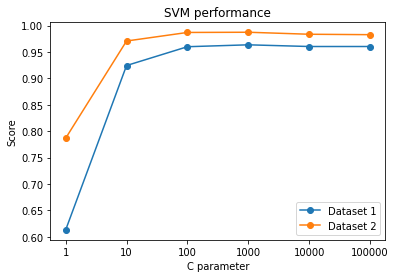

In [ ]:
values = range(len(cs))

plt.plot(resultsNormal1,marker="o")
plt.plot(resultsNormal2,marker="o")
plt.xlabel("C parameter")
plt.ylabel("Score")
plt.title("SVM performance")
plt.legend(['Dataset 1', 'Dataset 2'])
plt.xticks(values,cs)
plt.show()

In [ ]:
c = 1000
outputClassifier = MultiOutputClassifier(SVC(C=c,kernel='rbf',random_state=randomState),n_jobs=1);
outputClassifier.fit(X1Train,Y1Train);
scoreNormal = outputClassifier.score(X1Test,Y1Test);
scoreNormal

In [ ]:
c = 1000
outputClassifier = MultiOutputClassifier(SVC(C=c,kernel='rbf',random_state=randomState),n_jobs=1);
outputClassifier.fit(X2Train,Y2Train);
scoreNormal = outputClassifier.score(X2Test,Y2Test);
scoreNormal

0.9872

# Section c

## Dataset 1

In [ ]:
estimators = [20,30,40,50,60,70,80];
maxDepths = [1,2,5,10,15,20];

results = [None]*len(estimators);
for i, estimator in enumerate(estimators):
  aux = [None]*len(maxDepths);
  for j, maxDepth in enumerate(maxDepths):
    outputClassifier = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=estimator,max_depth=maxDepth),n_jobs=1);
    outputClassifier.fit(X1Train,Y1Train);
    aux[j] = outputClassifier.score(X1Test,Y1Test);
  print(estimator)
  results[i] = aux;

20
30
40
50
60
70
80


### Plotting results

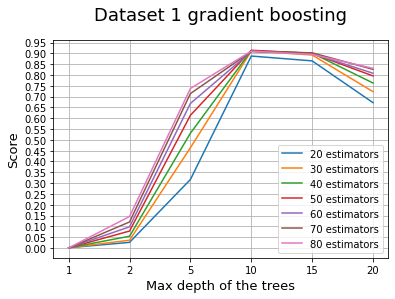

In [ ]:
xvalues = np.arange(1,len(maxDepths)+1,1)
namesDepths = list(map(str, maxDepths))
namesEstimators = [s + " estimators" for s in list(map(str, estimators))]

plt.title("Dataset 1 gradient boosting", fontsize=18, pad=20);
plt.xticks(xvalues,namesDepths);
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('Score',fontsize=13);
plt.xlabel('Max depth of the trees',fontsize=13);

for i,val in enumerate(estimators):
  plt.plot(xvalues,results[i])

plt.legend(namesEstimators)
plt.grid()
plt.savefig('sectionc_d1.png',bbox_inches='tight')
plt.show()

### Best parameters

In [ ]:
multi = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=50,max_depth=10),n_jobs=1);
multi.fit(X1Train,Y1Train);
multi.estimators_

[GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50)]

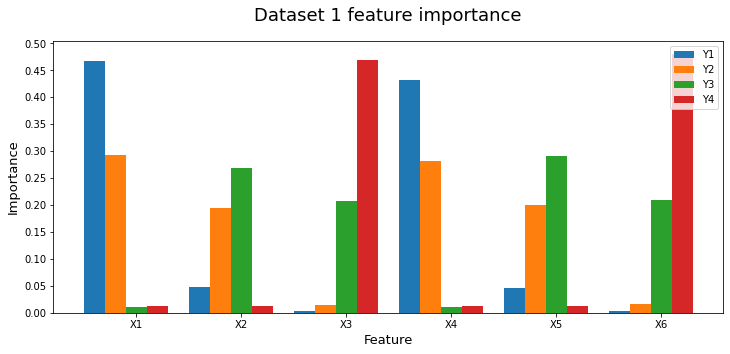

In [ ]:
xvalues = np.arange(1,len(attribCols)+1,1)
namesCols = list(map(str, attribCols))
width = 0.2

plt.figure(figsize=(12,5));
plt.title("Dataset 1 feature importance", fontsize=18, pad=20);
plt.xticks(xvalues+width,namesCols);
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('Importance',fontsize=13);
plt.xlabel('Feature',fontsize=13);
estimatorsClassifiers = multi.estimators_
for i,val in enumerate(estimatorsClassifiers):
  plt.bar(xvalues+(i-1)*width,val.feature_importances_,width)

plt.legend(targetCols)
plt.savefig('importance1.png',bbox_inches='tight')
plt.show()

## Dataset 2

In [ ]:
dataset_2.to_csv('dataset_2.csv', encoding = 'utf-8-sig')
files.download('dataset_2.csv')

In [ ]:
estimators = [20,30,40,50,60,70,80];
maxDepths = [1,2,5,10,15,20];

In [ ]:
results = [None]*len(estimators);
for i, estimator in enumerate(estimators):
  aux = [None]*len(maxDepths);
  for j, maxDepth in enumerate(maxDepths):
    outputClassifier = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=estimator,max_depth=maxDepth),n_jobs=1);
    outputClassifier.fit(X2Train,Y2Train);
    aux[j] = outputClassifier.score(X2Test,Y2Test);
  print(estimator)
  results[i] = aux;

Done in different colabs to increase the velocity

In [ ]:
results = [[0.0006, 0.0136, 0.2224, 0.9338, 0.9444, 0.9056],
           [0.0008, 0.019, 0.4338, 0.9504, 0.9474, 0.9318],
           [0.0008, 0.0332, 0.5404, 0.9528, 0.95, 0.9426],
           [0.0014, 0.047, 0.615, 0.9534, 0.9508, 0.9408],
           [0.0016, 0.0652, 0.6724, 0.9532, 0.951, 0.9452],
           [0.0012, 0.0904, 0.7126, 0.9518, 0.9494, 0.9468],
           [0.0012, 0.101, 0.751, 0.95, 0.949, 0.9468]]

### Plotting results

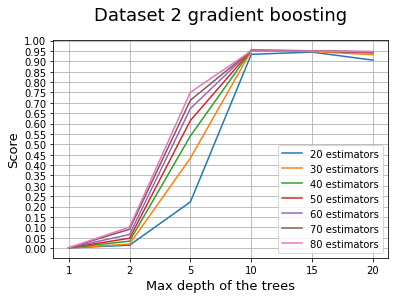

In [ ]:
xvalues = np.arange(1,len(maxDepths)+1,1)
namesDepths = list(map(str, maxDepths))
namesEstimators = [s + " estimators" for s in list(map(str, estimators))]

plt.title("Dataset 2 gradient boosting", fontsize=18, pad=20);
plt.xticks(xvalues,namesDepths);
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('Score',fontsize=13);
plt.xlabel('Max depth of the trees',fontsize=13);

for i,val in enumerate(estimators):
  plt.plot(xvalues,results[i])

plt.legend(namesEstimators)
plt.grid()
plt.savefig('sectionc_d2.png',bbox_inches='tight')
plt.show()

### Best parameters

In [ ]:
multi = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=50,max_depth=10),n_jobs=1);
multi.fit(X2Train,Y2Train);
multi.estimators_

[GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50),
 GradientBoostingClassifier(max_depth=10, n_estimators=50)]

In [ ]:
xvalues = np.arange(1,len(attribCols)+1,1)
namesCols = list(map(str, attribCols))
width = 0.2

plt.figure(figsize=(12,5));
plt.title("Dataset 2 feature importance", fontsize=18, pad=20);
plt.xticks(xvalues+width,namesCols);
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('Importance',fontsize=13);
plt.xlabel('Feature',fontsize=13);
estimatorsClassifiers = multi.estimators_
for i,val in enumerate(estimatorsClassifiers):
  plt.bar(xvalues+(i-1)*width,val.feature_importances_,width)

plt.legend(targetCols)
plt.savefig('importance2.png',bbox_inches='tight')
plt.show()